<a href="https://colab.research.google.com/github/corydoras15/Linear-Regression/blob/main/3_Decision_Tree_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_df = pd.read_csv('https://raw.githubusercontent.com/DSNote/fastcampus/main/bike.csv')

# 종속변수 확인

In [3]:
bike_df.head() # 종속변수 확인

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 0:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,NaN,NaN,20,Clouds
1,2018-01-01 1:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,NaN,NaN,1,Clear
2,2018-01-01 2:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,NaN,NaN,1,Clear
3,2018-01-01 3:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,NaN,NaN,1,Clear
4,2018-01-01 4:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,NaN,NaN,1,Clear


In [8]:
bike_df[bike_df['workingday'] == 0]['holiday'].unique() # workingday가 0 중에 holiday의 카테고리 종류

array([1, 0])

In [10]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      33379 non-null  object 
 1   count         33379 non-null  int64  
 2   holiday       33379 non-null  int64  
 3   workingday    33379 non-null  int64  
 4   temp          33379 non-null  float64
 5   feels_like    33379 non-null  float64
 6   temp_min      33379 non-null  float64
 7   temp_max      33379 non-null  float64
 8   pressure      33379 non-null  int64  
 9   humidity      33379 non-null  int64  
 10  wind_speed    33379 non-null  float64
 11  wind_deg      33379 non-null  int64  
 12  rain_1h       6771 non-null   float64
 13  snow_1h       326 non-null    float64
 14  clouds_all    33379 non-null  int64  
 15  weather_main  33379 non-null  object 
dtypes: float64(7), int64(7), object(2)
memory usage: 4.1+ MB


In [11]:
bike_df.describe()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all
count,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,6771.000000,326.000000,33379.000000
mean,333.139788,0.030618,0.681327,15.213087,14.994843,13.532648,16.105542,1017.071602,67.818628,1.829340,174.022919,1.216475,0.641380,63.213997
std,336.519514,0.172283,0.465969,9.908964,11.176487,9.993094,9.984839,7.379420,18.422105,1.703747,113.844334,2.056222,0.571087,30.825936
min,0.000000,0.000000,0.000000,-12.790000,-18.910000,-15.140000,-12.290000,980.000000,14.000000,0.000000,0.000000,0.100000,0.100000,0.000000
25%,59.000000,0.000000,0.000000,6.860000,5.880000,5.230000,7.730000,1012.000000,53.000000,0.450000,62.000000,0.250000,0.250000,40.000000
50%,236.000000,0.000000,1.000000,15.650000,15.020000,13.910000,16.590000,1017.000000,70.000000,1.340000,180.000000,0.530000,0.420000,75.000000
75%,495.000000,0.000000,1.000000,23.800000,24.140000,21.970000,24.390000,1022.000000,84.000000,2.600000,285.000000,1.300000,1.000000,90.000000
max,2038.000000,1.000000,1.000000,36.710000,43.710000,35.380000,38.810000,1044.000000,100.000000,16.980000,360.000000,54.050000,3.300000,100.000000


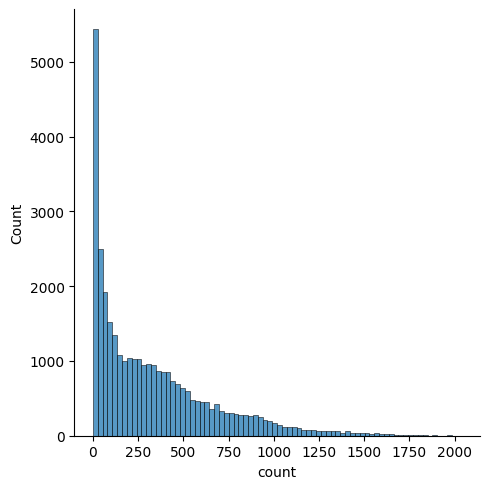

In [12]:
sns.displot(bike_df['count'])

<Axes: ylabel='count'>

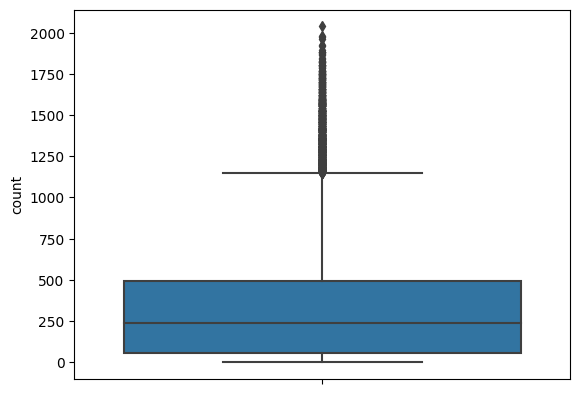

In [13]:
sns.boxplot(y = bike_df['count'])

<Axes: xlabel='feels_like', ylabel='count'>

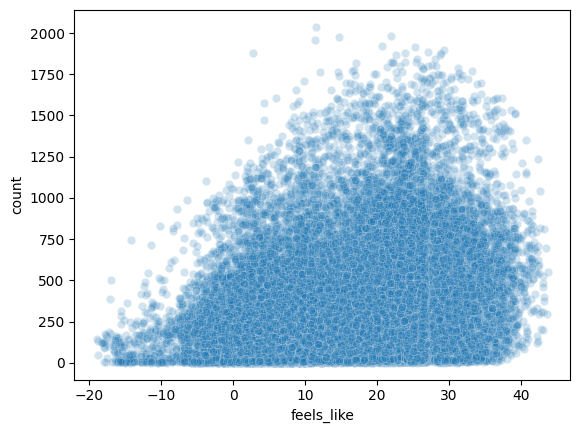

In [15]:
sns.scatterplot(x = 'feels_like', y = 'count', data = bike_df, alpha = 0.2) # alpha = 1불투명, 0투명

<Axes: xlabel='pressure', ylabel='count'>

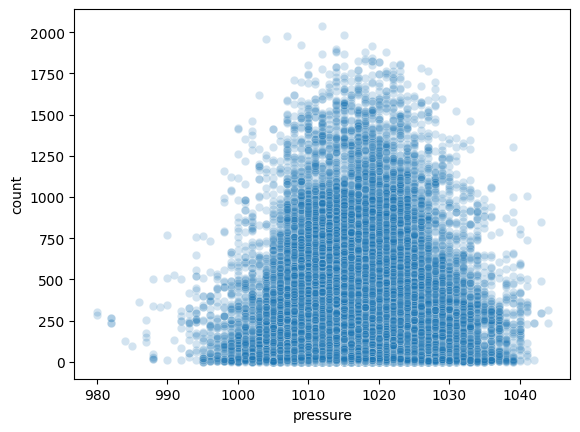

In [16]:
sns.scatterplot(x = 'pressure', y = 'count', data = bike_df, alpha = 0.2)

<Axes: xlabel='wind_speed', ylabel='count'>

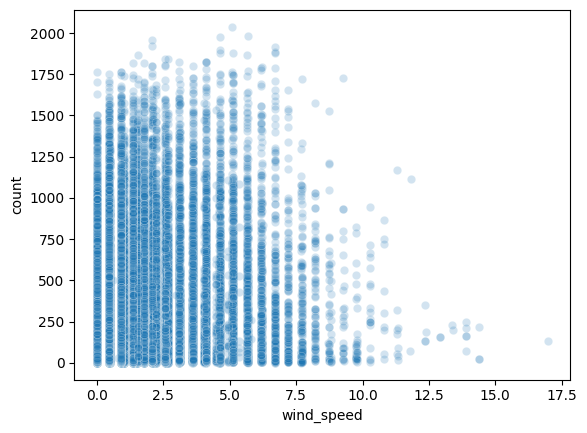

In [17]:
sns.scatterplot(x = 'wind_speed', y = 'count', data = bike_df, alpha = 0.2)

<Axes: xlabel='wind_deg', ylabel='count'>

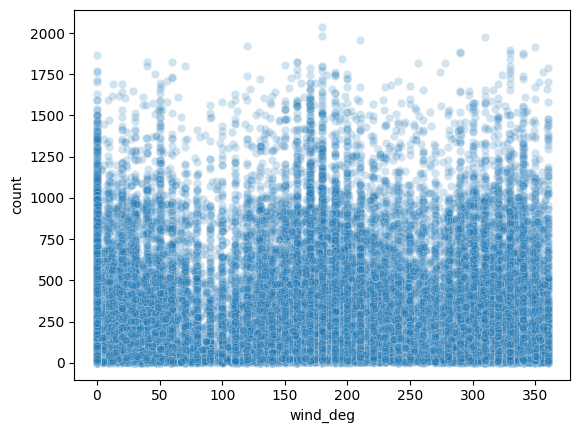

In [18]:
sns.scatterplot(x = 'wind_deg', y = 'count', data = bike_df, alpha = 0.2)

<Axes: xlabel='weather_main', ylabel='count'>

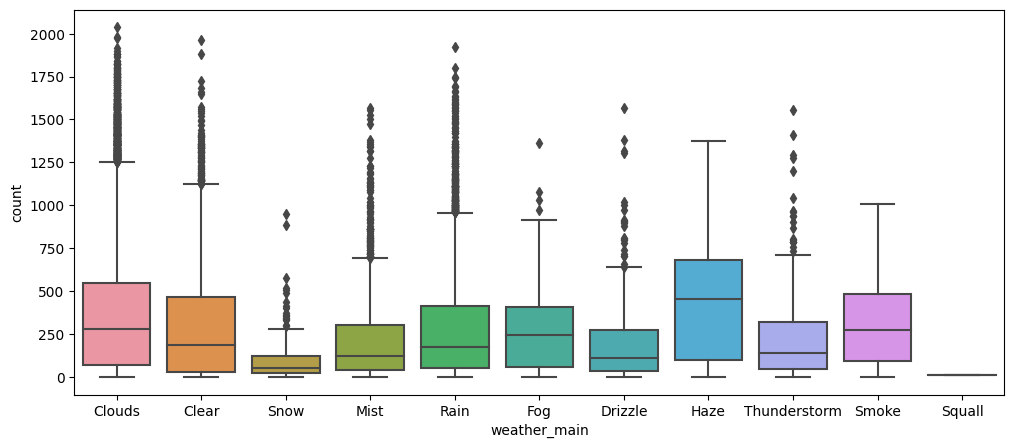

In [21]:
plt.figure(figsize = (12, 5)) # 차트 크기 변경 (X, Y)
sns.boxplot(x = 'weather_main', y = 'count', data = bike_df)

# 결측치 처리